****Clustering Tutorial**: K-Means on Mall Customers Data from Kaggle**

This script performs the following:
1. Loads the Mall Customers dataset from a CSV file downloaded from Kaggle.
2. Extracts key features: Annual Income (k$), and Spending Score (1-100).
3. Scales the data.
4. Uses the elbow method and silhouette analysis to determine the optimal number of clusters.
5. Applies K-Means clustering.
6. Visualizes the results with:
   - Elbow method plot
   - Silhouette plot


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [80]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
df = df.rename(columns={
    "Age": "Age",
    "Annual Income (k$)": "Annual_Income",
    "Spending Score (1-100)": "Spending_Score"
})
df = df.drop(columns= ['CustomerID', 'Gender'])
df.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [82]:
sc = StandardScaler()
scaled_features = sc.fit_transform(df)
scaled_features

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

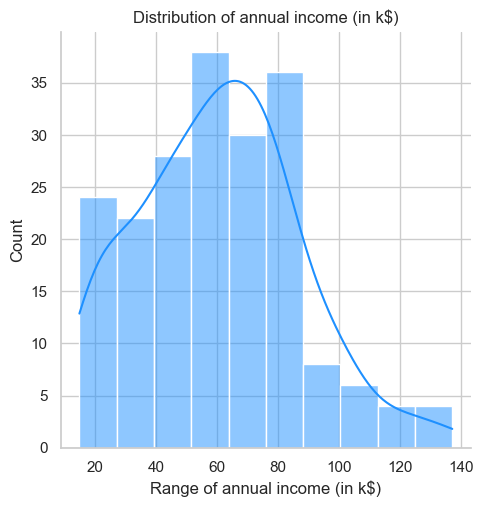

In [83]:

sns.displot(df["Annual_Income"], kde = True, color="dodgerblue")
plt.title("Distribution of annual income (in k$)")
plt.xlabel("Range of annual income (in k$)")
plt.ylabel("Count")

plt.show()

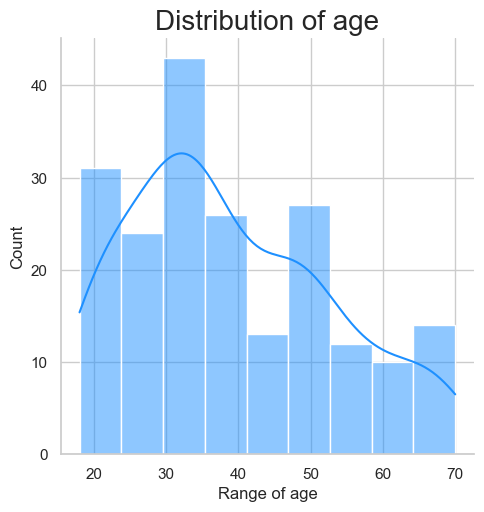

In [84]:
sns.displot(df["Age"], kde=True, color="dodgerblue")

plt.title('Distribution of age', fontsize = 20)
plt.xlabel('Range of age')
plt.ylabel('Count')

plt.show()

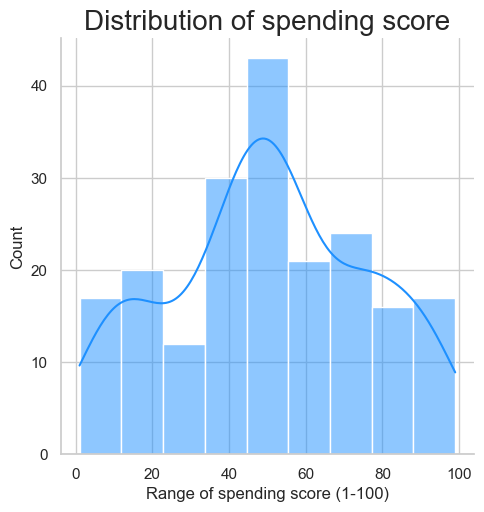

In [85]:
sns.displot(df["Spending_Score"], kde=True, color="dodgerblue")

plt.title('Distribution of spending score', fontsize = 20)
plt.xlabel('Range of spending score (1-100)')
plt.ylabel('Count')

plt.show()

In [86]:
X_scaled = scaled_features[:, [1, 2]] 
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

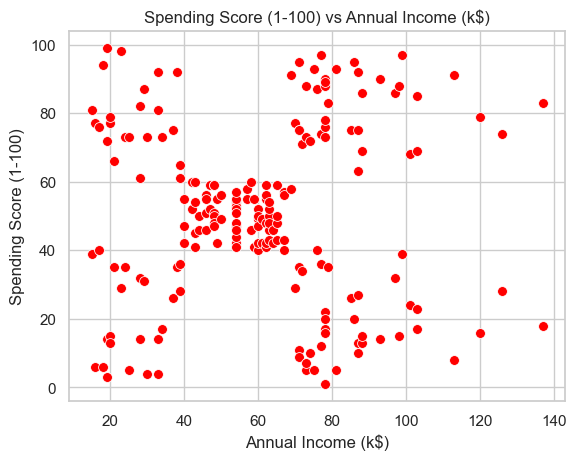

In [87]:
# scatterplot of the above data
sns.scatterplot(x="Annual_Income", y="Spending_Score", data=X, s=50, color="red")

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

plt.show()

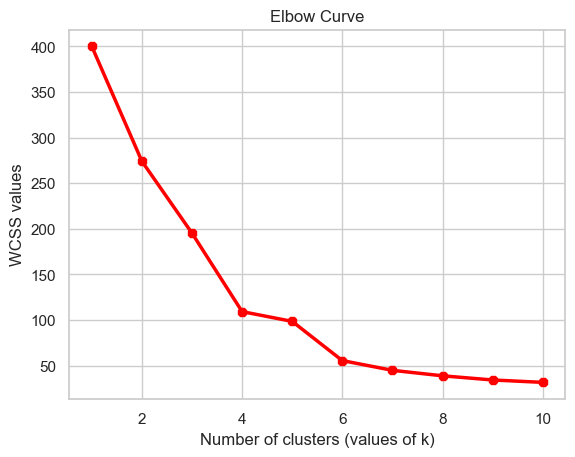

In [88]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X_scaled)
    wcss.append(k_means.inertia_)
    

plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")


plt.show()

In [ ]:
k_means = KMeans(n_clusters=5, n_init= "auto")
k_means.fit(X_scaled)
y_pred = k_means.predict(X_scaled)

df["label"] = y_pred

df.head()

,Age,Annual_Income,Spending_Score,label
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4


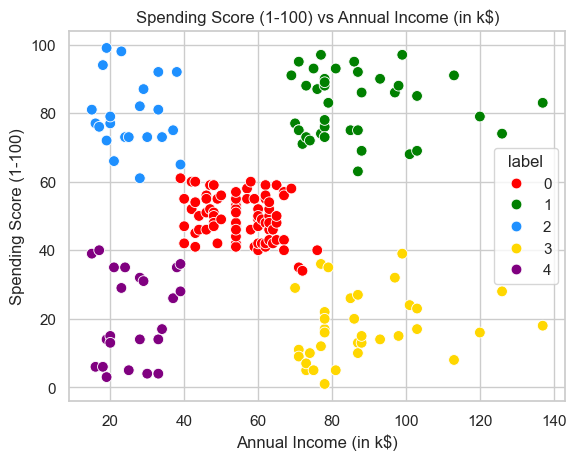

In [91]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]


sns.scatterplot(
    x="Annual_Income",
    y="Spending_Score",
    hue="label", 
    palette=colors, 
    legend="full", 
    data=df, 
    s=60
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()

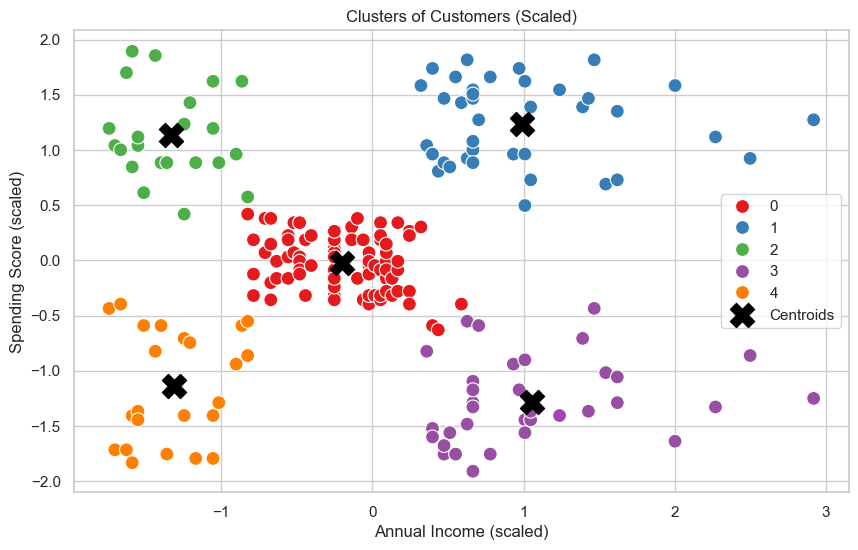

In [98]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['label'], palette="Set1", s=100)

# Plot centroids (already in scaled space)
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s=300, c='black', marker='X', label='Centroids')

plt.title("Clusters of Customers (Scaled)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

In [92]:
scores = []
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.396
K=3, Silhouette Score=0.468
K=4, Silhouette Score=0.494
K=5, Silhouette Score=0.554
K=6, Silhouette Score=0.513
K=7, Silhouette Score=0.502
K=8, Silhouette Score=0.496
K=9, Silhouette Score=0.456
K=10, Silhouette Score=0.443


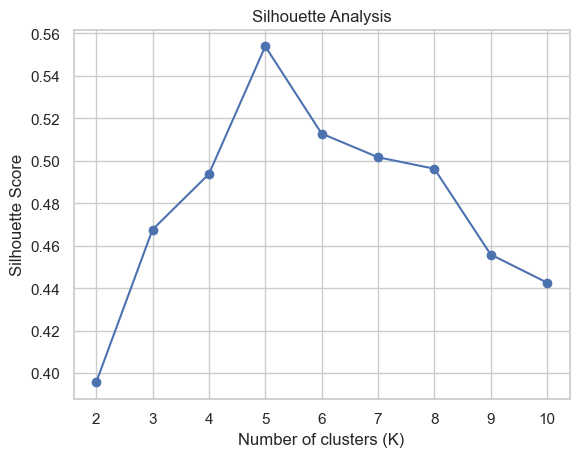

In [93]:
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()